In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import seaborn as sns

## Load the training and test datasets

In [53]:
# Load the datasets
training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"

# Define features and target
independent_cols = ['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']
dependent_cols = 'fire'  # Target column

df_training = pd.read_csv(training_file)
df_test = pd.read_csv(test_file)

# Inspect the training dataset
print(df_training.head())
print(df_training.shape)
print(df_test.head())
print(df_test.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017   

## Prepare features (X) and target (y) for the training dataset

In [54]:
# Convert 'fire' column to binary values (1 for 'yes', 0 for 'no')
df_training[dependent_cols] = df_training[dependent_cols].map({'yes': 1, 'no': 0})

# Split the training data into features (X) and target (y)
X_training = df_training.loc[:,independent_cols]
y_training = df_training.loc[:,dependent_cols]

# Check the transformation
df_training.head()

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0,2015,28,59,0.0,8.06,3.47,1,6,19
1,0,2010,30,61,1.3,8.17,4.03,2,6,13
2,0,2009,26,83,13.1,8.08,3.59,3,6,22
3,0,2017,25,87,2.5,7.18,2.42,4,6,15
4,0,2014,28,77,0.0,14.98,4.63,5,6,18


## Set up a matrix and vector for the test set

In [55]:
# Convert 'fire' column to binary values (1 for 'yes', 0 for 'no')
df_test[dependent_cols] = df_test[dependent_cols].map({'yes': 1, 'no': 0})

# Split the training data into features (X) and target (y)
X_test = df_test.loc[:,independent_cols]
y_test = df_test.loc[:,dependent_cols]

# Check the transformation
df_test.head()

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0,2015,33,68,4.5,9.12,5.09,19,6,16
1,1,2009,28,56,0.0,38.17,21.21,12,6,18
2,0,2017,30,64,0.6,15.38,6.24,24,9,19
3,0,2007,23,74,8.3,7.36,2.27,14,9,28
4,0,2017,31,72,0.3,30.47,5.63,7,9,17


## Train the Logistic Regression Model

In [56]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_training, y_training)

C:\Users\skeha\OneDrive\Documents\4BCT\CT4101 - Machine Learning\Classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Compute the predictions for the training and test sets

In [75]:
y_training_pred = logreg.predict(X_training)
y_test_pred = logreg.predict(X_test)

print("Classification Report (Training set):", classification_report(y_training, y_training_pred))
print("Accuracy of default parameters on training set: ", accuracy_score(y_training, y_training_pred))

print("\nClassification Report (Test set):", classification_report(y_test, y_test_pred))
print("Accuracy of default parameters on test set: ", accuracy_score(y_test, y_test_pred))

Classification Report (Training set):               precision    recall  f1-score   support

           0       0.83      0.92      0.87        75
           1       0.92      0.82      0.87        79

    accuracy                           0.87       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.87      0.87      0.87       154

Accuracy of default parameters on training set:  0.8701298701298701
Classification Report (Test set):               precision    recall  f1-score   support

           0       0.73      0.86      0.79        22
           1       0.88      0.75      0.81        28

    accuracy                           0.80        50
   macro avg       0.80      0.81      0.80        50
weighted avg       0.81      0.80      0.80        50

Accuracy of default parameters on test set:  0.8


## Visualize the data

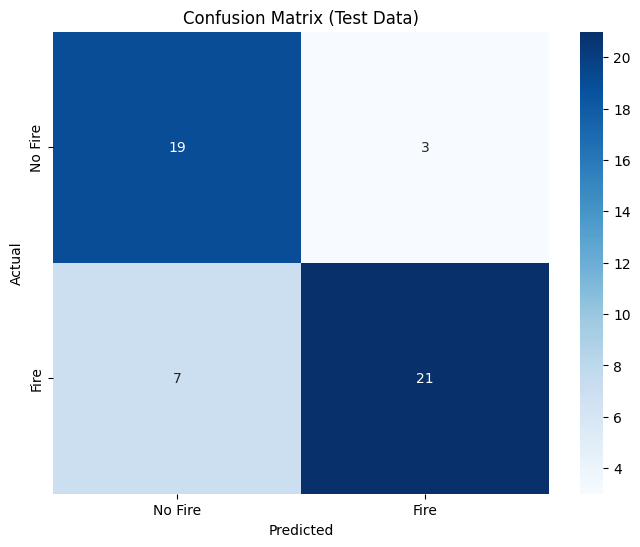

In [74]:
# Generate a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Find the Tuning Parameters

In [104]:
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune
solvers = ['lbfgs', 'liblinear', 'saga']
C_values = [0.1, 1, 10]

best_accuracy = 0
best_params = []

# Loop through the hyperparameter
for solver in solvers:
    for C in C_values:
        print("Evaluation of Logistic Regression Model")
        
        # Initialize Logistic Regression
        logreg = LogisticRegression(solver=solver, C=C, max_iter=10000)
        
        # Train the model
        logreg.fit(X_training, y_training)
        
        # Predictions on the training and test sets
        y_training_pred = logreg.predict(X_training)
        y_test_pred = logreg.predict(X_test)
        
        # Compute accuracies
        training_accuracy = accuracy_score(y_training, y_training_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
                # Print out the results with solver and C value
        print(f"Solver: {solver} \nC: {C}")
        print(f"Training Accuracy: {training_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print("-" * 60)
        
        # Update the best parameters if test accuracy improves
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_params = [{'C': C, 'solver': solver}]  # Start a new list
        elif test_accuracy == best_accuracy:
            best_params.append({'C': C, 'solver': solver})  # Append to the existing list

# Output the best hyperparameter combinations
print("\nBest performing hyperparameters:")
for params in best_params:
    print(f"C={params['C']}, solver={params['solver']}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Print the classification report and accuracy for the lbfgs solver with C = 1
best_solver = 'lbfgs'
best_C = 1

# Initialize and train the model with best parameters
final_model = LogisticRegression(solver=best_solver, C=best_C, max_iter=10000)
final_model.fit(X_training, y_training)

# Predictions on the test set
y_test_pred = final_model.predict(X_test)

# Print the classification report and accuracy
print("\nClassification Report (Training set after tuning):")
print(classification_report(y_training, y_training_pred))
print("Accuracy of default parameters on test set: ", accuracy_score(y_training, y_training_pred))

# Print the classification report and accuracy
print("\nClassification Report (Test set after tuning):")
print(classification_report(y_test, y_test_pred))
print("Accuracy of default parameters on test set: ", accuracy_score(y_test, y_test_pred))

Evaluation of Logistic Regression Model
Solver: lbfgs 
C: 0.1
Training Accuracy: 0.8961
Test Accuracy: 0.8200
------------------------------------------------------------
Evaluation of Logistic Regression Model
Solver: lbfgs 
C: 1
Training Accuracy: 0.9091
Test Accuracy: 0.9000
------------------------------------------------------------
Evaluation of Logistic Regression Model
Solver: lbfgs 
C: 10
Training Accuracy: 0.9221
Test Accuracy: 0.8800
------------------------------------------------------------
Evaluation of Logistic Regression Model
Solver: liblinear 
C: 0.1
Training Accuracy: 0.8961
Test Accuracy: 0.8200
------------------------------------------------------------
Evaluation of Logistic Regression Model
Solver: liblinear 
C: 1
Training Accuracy: 0.9091
Test Accuracy: 0.9000
------------------------------------------------------------
Evaluation of Logistic Regression Model
Solver: liblinear 
C: 10
Training Accuracy: 0.9221
Test Accuracy: 0.8800
-----------------------------

#### By tuning the hyperparameters we have seen an increase of 12.5% in accuracy of the trained model on the test set, from 80% accuracy to 90%. We have two best performing hyperparameters, 

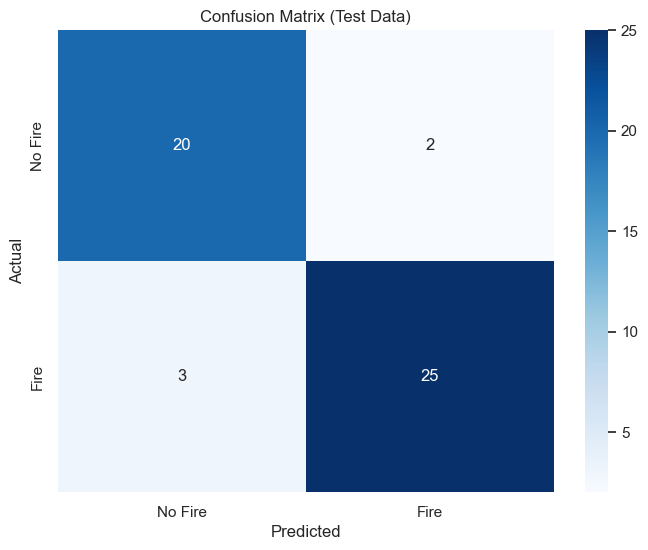

In [99]:
# Generate a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# True Positives = 20
# True Negatives = 25
# False Positive = 2
# False Negatives = 3

## Visualize

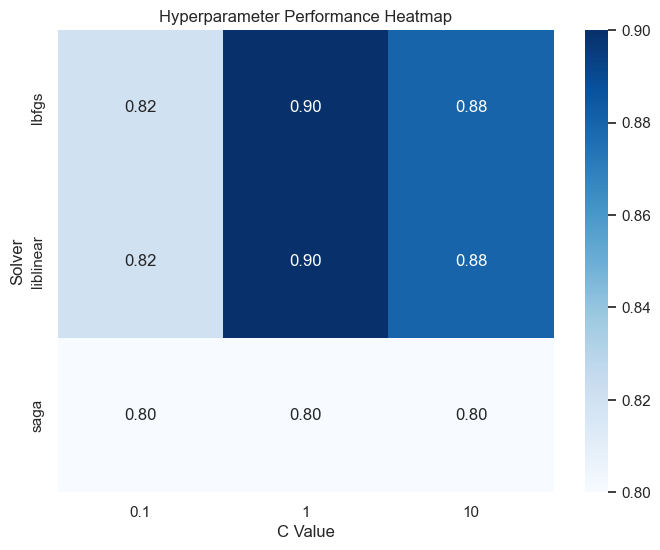

In [102]:
test_accuracies = {
    'lbfgs': [0.8200, 0.9000, 0.8800],
    'liblinear': [0.8200, 0.9000, 0.8800],
    'saga': [0.8000, 0.8000, 0.8000]
}

# Creating performance data for the heatmap
performance_data = np.array([
    test_accuracies['lbfgs'],
    test_accuracies['liblinear'],
    test_accuracies['saga'],
])

# Plotting Hyperparameter Performance Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(performance_data, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=C_values, yticklabels=solvers)
plt.title('Hyperparameter Performance Heatmap')
plt.xlabel('C Value')
plt.ylabel('Solver')
plt.show()

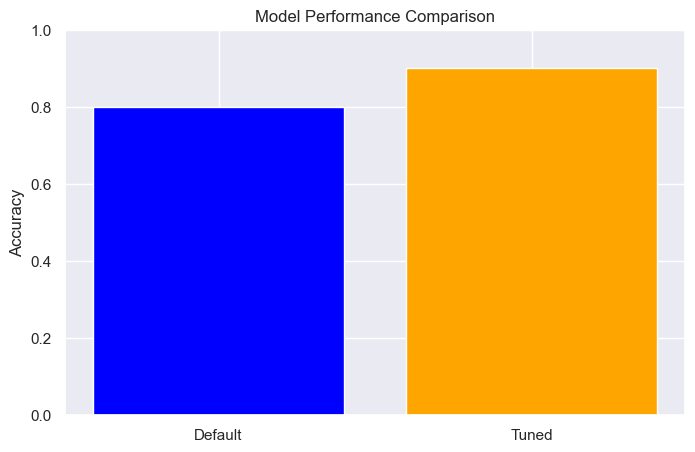

In [97]:
# Bar chart comparing model performances
models = ['Default', 'Tuned']
accuracies = [0.80, 0.90] 

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()


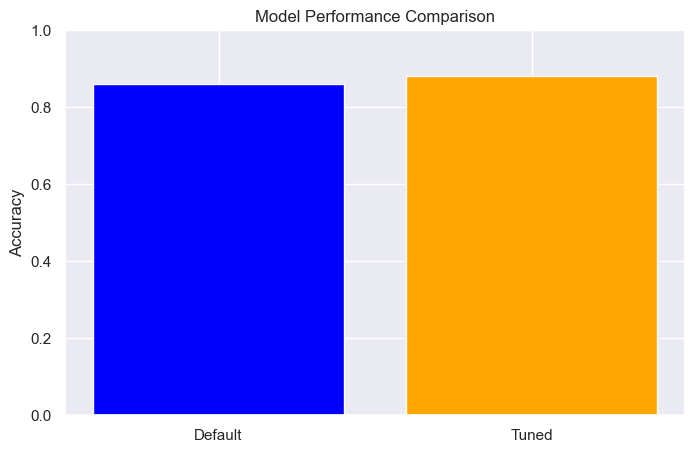

In [105]:
# Bar chart comparing model performances
models = ['Default', 'Tuned']
accuracies = [0.86, 0.88] 

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()
